Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [1]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [2]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

Q2) [20 points] Implement the logistic regression cross entropy cost discussed in class. Note that the logistic regression cross entropy cost relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost. Again, the logistic regression cross entropy function should use the sigmoid and model functions already implemented.

In [3]:
#Your linear model from HW2
def model(x,w):
    y = x*w[1]+w[0] # y=w_0+w_1x
    return y

#The logistic regression cross entropy cost
def LR_cross_entropy(w,x,y):
    epsilon = 0.000001 #to prevent taking log(0)
    sum = np.sum(y*np.log(sigmoid(model(x,w)) + epsilon)+(1-y)*np.log(1-sigmoid(model(x,w))+epsilon))
    cost = -sum/x.size
    return cost

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

Text(0, 0.5, 'y')

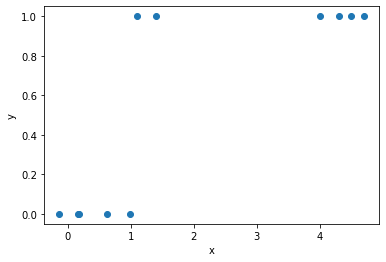

In [4]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [5]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function  
    
    weight_history = []
    cost_history = []
    weight_history.append(w)
    cost_history.append(g(w,x,y))
    
    for k in range(max_its):
        w = w - alpha*gradient(w,x,y)
        weight_history.append(w)
        cost_history.append(g(w,x,y)) # log error cost function
    
    return weight_history,cost_history

Text(0.5, 1.0, 'Cost History using Log Error Cost')

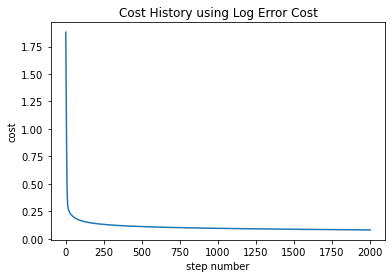

In [6]:
##Call the gradient_descent function here

g = LR_cross_entropy
alpha = 1
max_its = 2000
w=np.array([3.0,3.0])

weight_history,cost_history = gradient_descent(g, alpha, max_its, w, x, y)

##Plot the cost history here
x_runs = list(range(max_its+1))
plt.plot(x_runs, cost_history)

plt.xlabel('step number')
plt.ylabel('cost')
plt.title("Cost History using Log Error Cost")

Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [7]:
def logistic_regression(learned_w,x):
    positive_class_prob = sigmoid(model(x,learned_w))
    return positive_class_prob

Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


Text(0.5, 1.0, 'Logistic regression function with learned weights')

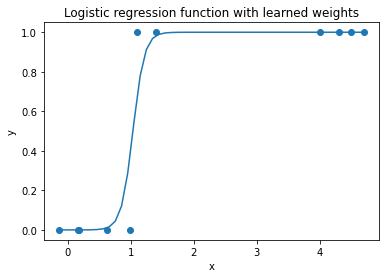

In [8]:
s = np.linspace(np.min(x),np.max(x))
learned_w = weight_history[len(weight_history)-1]
y_predicted = logistic_regression(learned_w,s)
plt.plot(s,y_predicted) # plot logistic regression function
plt.scatter(x,y) # plot original data

plt.xlabel('x')
plt.ylabel('y')
plt.title("Logistic regression function with learned weights")

Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [9]:
def logistic_regression_modified(learned_w,x, threshold):
    positive_class_prob = sigmoid(model(x,learned_w))
    positive_class_prob[positive_class_prob>threshold]=1
    positive_class_prob[positive_class_prob<threshold]=0
    positive_class_prob[positive_class_prob==threshold]=np.random.randint(0,2)
    return positive_class_prob

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [10]:
def evaluate(y_actual,y_pred):
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for act, pred in zip(y_actual[0],y_pred[0]):
        if act == 1 and pred == 1:
            true_positive+=1
        elif act == 0 and pred == 0:
            true_negative+=1
        elif act == 0 and pred == 1:
            false_positive+=1
        else:
            false_negative+=1
    
    accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
    
    return false_positive, false_negative, true_positive, true_negative, accuracy

y_pred = logistic_regression_modified(learned_w,x,0.5)
C,B,A,D,acc = evaluate(y, y_pred)
confusion_matrix = np.array([[A,B],[C,D]])

print("confusion matrix:")
print(confusion_matrix)

print("\nAccuracy: " + str(acc))

confusion matrix:
[[6 0]
 [0 5]]

Accuracy: 1.0


Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [11]:
def perceptron_cost(w,x,y):    
    sum = np.sum(np.log(1+np.exp(-y*model(x,w))))
    cost = sum/x.size
    return cost

Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=10. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?


Text(0.5, 1.0, 'Cost History using Perceptron Cost')

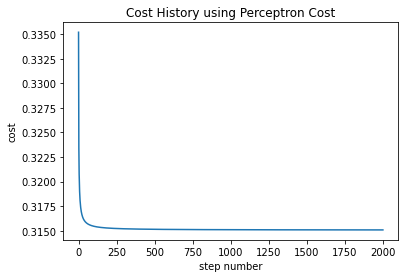

In [12]:
##Call the gradient_descent function here
g = perceptron_cost
alpha = 10
max_its = 2000
w=np.array([1.0,1.0])

weight_history,cost_history = gradient_descent(g, alpha, max_its, w, x, y)

##Plot the cost history here

x_runs = list(range(max_its+1))
plt.plot(x_runs, cost_history)

plt.xlabel('step number')
plt.ylabel('cost')
plt.title("Cost History using Perceptron Cost")

I would argue that the perceptron cost seems to do better than the log error cost for this dataset, converging to the minimum in fewer iterations. Though this may be due to the use of a higher alpha (a=10 for perceptron vs a=1 for log error), it is also likely due to the fact that the perceptron includes the exponential function inside the cost.

The log error does not perform poorly, however. In fact, it performs quite similarly, still reaching the minimum relatively quickly and having a similar L-shape, something to be expected since both functions utilize the log to harshly penalize misclassifications. The log error does seem to have something going for it however in that it does seem to more harshly penalize misclassifications. Its cost when there were a large number of misclassifications (around step 0) is around 1.5 greater than the minimum whereas for the perceptron cost it was only around 0.02 greater than the minimum.

One might alternatively argue that we should look at the minimum cost (log error has the lower minimum cost in this scenario), but I would argue that it is not fair to compare the minimum costs since each cost is calculated in a different way. Generally, both log error and perceptron return the same boundary, just from different approaches, thus generating different costs. It has no reflection on which generated the better model (this would only later be tested by counting classifications/misclassifications in a confusion matrix).

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [13]:
csvname = 'heart.csv'
data = np.loadtxt(csvname,delimiter = ',',skiprows=1)

Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [14]:
X=data[:,:13]
y=data[:,13]

Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [16]:
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train) #for testing set to randomstate=0

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [17]:
predicted_prob = clf.predict_proba(X_test)

Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [18]:
pred_pos = predicted_prob[:,1]

Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

Thresholds:
[1.98827322e+00 9.88273221e-01 8.90575842e-01 8.86246815e-01
 8.06847909e-01 7.79225530e-01 7.17070795e-01 6.90427028e-01
 6.73170624e-01 6.69243312e-01 4.96699699e-01 1.90117951e-01
 9.75863976e-02 6.69118629e-02 6.03901012e-02 4.47157751e-02
 4.19208731e-02 1.18473242e-03]


Text(0.5, 1.0, 'ROC Curve')

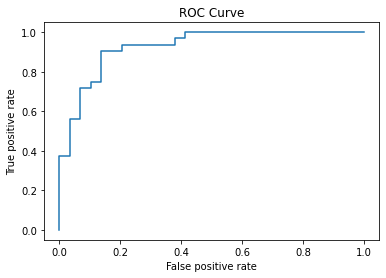

In [19]:
##Your code here
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_pos)
print("Thresholds:")
print(thresholds)

plt.plot(fpr,tpr)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC Curve")

Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [20]:
##Your code here
auc = metrics.roc_auc_score(y_test, pred_pos)
print("AUC: "+str(auc))
print("\nMeans it is " + str(auc-0.5) + " better than random chance")

AUC: 0.9267241379310345

Means it is 0.4267241379310345 better than random chance
